# Import Data and Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
transjakartaDataset = pd.read_csv('Transjakarta.csv')
transjakartaDataset

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# Data Value Checking

In [3]:
transjakartaDataset

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [4]:
transjakartaDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
display(transjakartaDataset.describe(), transjakartaDataset.describe(include= 'object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [6]:
transjakartaDataset.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [7]:
transjakartaDataset.isnull().sum()/len(transjakartaDataset)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [8]:
df = transjakartaDataset

# Data Cleaning

## Cleaning Data Corridor

In [9]:
missing_ID = df[df['corridorID'].isna()&df['corridorName'].notna()]
missing_Name = df[df['corridorID'].notna()&df['corridorName'].isna()]
display(missing_ID, missing_Name)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
438,ZSKN064X5H54BG,3565938568828570,dki,Oliva Saefullah,F,1987,NaN,Rusun Waduk Pluit - Penjaringan,1.0,B06295P,...,106.80402,3,2023-04-03 16:32:41,B03299P,Rusun Waduk Pluit,-6.111456,106.80022,6.0,2023-04-03 18:28:24,0.0
895,OFCJ082L9C92QS,4582951929146910,dki,H. Jarwadi Suartini,M,2002,NaN,Tanah Abang - Kebayoran Lama,1.0,B01335P,...,106.78336,18,2023-04-04 06:51:34,B05102P,Simpang Rawa Belong Palmerah Barat,-6.206630,106.78342,20.0,2023-04-04 07:29:13,0.0
1410,EUXH858P4W72ZO,4729302648273942756,brizzi,Unjani Usamah,F,2003,NaN,Sunter Boulevard Barat - Penjaringan,0.0,P00131,...,106.82597,8,2023-04-05 05:59:12,P00008,Bandengan Selatan,-6.136318,106.80347,11.0,2023-04-05 06:57:56,3500.0
1723,HFYN062T4K54JK,4607578492019777,dki,Mutia Latupono,M,2002,NaN,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,P00258,...,106.92463,31,2023-04-05 17:10:36,P00191,PTC Pulo Gadung,-6.182622,106.91561,32.0,2023-04-05 19:07:54,3500.0
2423,HXOS235N0G80OX,213191293100137,emoney,Darman Purwanti,M,1999,NaN,Kampung Melayu - Pulo Gebang via BKT,0.0,B02335P,...,106.89620,18,2023-04-07 06:06:39,B05256P,SMAN 100,-6.228401,106.88494,21.0,2023-04-07 06:51:15,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37008,FPHP255E9G24MW,4121673937975,online,H. Eko Novitasari,F,1994,NaN,JIS - Terminal Muara Angke,0.0,B06563P,...,106.77963,38,2023-04-18 18:32:22,B05714P,Term. Muara Angke 2,-6.109001,106.77349,40.0,2023-04-18 19:50:08,0.0
37113,JEWP630L2B54XZ,349683800593553,emoney,Asirwada Megantara,F,2009,NaN,Rusun Cipinang Besar Selatan - Penas Kalimalang,0.0,B03270P,...,106.88288,0,2023-04-18 18:17:14,B05785P,TPU Kb. Nanas 2,-6.232106,106.88017,1.0,2023-04-18 19:18:27,0.0
37337,GXHM211P5G49NI,2221445182130548,dki,Natalia Haryanti,F,1993,NaN,Cibubur - BKN,1.0,B00226P,...,106.89628,1,2023-04-19 11:06:35,B00248P,Cibubur Junction,-6.368735,106.89366,2.0,2023-04-19 12:47:51,3500.0
37380,XUMJ867G9E94VY,340306170432199,emoney,Carla Utama,F,1980,NaN,Kampung Melayu - Pondok Kelapa,0.0,B05653P,...,106.87352,5,2023-04-19 06:54:48,B02077P,Koperasi Serba Usaha,-6.222036,106.89954,23.0,2023-04-19 07:32:47,0.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,B02994P,...,106.84025,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,P00202,...,106.85809,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,B05324P,...,106.79423,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0
73,UCMI767D7M79GS,4766007569419196,dki,"Danu Suartini, S.Farm",M,2010,M3,NaN,1.0,P00237,...,106.71929,2,2023-04-03 06:49:46,P00009,Bank Indonesia Arah Selatan,-6.184784,106.82326,14.0,2023-04-03 07:21:09,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37739,FWQV480Z5I37OH,580183341537,flazz,Rika Sihombing,M,1986,JAK.13,NaN,1.0,B05700P,...,106.81172,0,2023-04-08 05:10:14,B02497P,Museum Bahari 1,-6.127695,106.80845,1.0,2023-04-08 05:40:25,0.0
37792,HTYN200W0M88AC,4237219123070834,dki,Luwar Sihombing,M,2008,S31,NaN,1.0,B01184P,...,106.78705,2,2023-04-26 15:41:39,B03177P,RS Siloam,-6.292071,106.78467,3.0,2023-04-26 16:45:16,20000.0
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,NaN,1.0,B04394P,...,106.77141,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,...,106.78857,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0


In [10]:
pd.set_option('display.max_rows', 50)
df_corridor = df.groupby(by= ['corridorID', 'corridorName']).size().reset_index()
df_corridor

,corridorID,corridorName,0
0,1,Blok M - Kota,230
1,10,Tanjung Priok - PGC 2,97
2,10A,Rusun Marunda - Tanjung Priok,142
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,137
4,10D,Kampung Rambutan - Tanjung Priok,164
...,...,...,...
216,S21,Ciputat - CSW,383
217,S22,Ciputat - Kampung Rambutan,133
218,S31,Bintaro - Fatmawati,146
219,T11,Poris Plawad - Bundaran Senayan,256


Menyesuaikan data corridorId dan corridorName yang hilang berdasarkan data yang ada

In [11]:
corridorName_map = pd.Series(df_corridor.corridorName.values, index= df_corridor.corridorID).to_dict()
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridorName_map))

corridorID_map = pd.Series(df_corridor.corridorID.values, index= df_corridor.corridorName).to_dict()
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorID_map))

Cek apakah masih terdapat data corridorID dan corridorName yang masih dapat disesuaikan

In [12]:
missing_ID = df[df['corridorID'].isna()&df['corridorName'].notna()]
missing_Name = df[df['corridorID'].notna()&df['corridorName'].isna()]
display(missing_ID, missing_Name)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [13]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [14]:
transjakartaDataset.describe(include= 'object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36775,36775,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,400,236,243,3,306,316,3


In [15]:
multiple_ids_per_name = df_corridor['corridorName'].value_counts()
shared_names = multiple_ids_per_name[multiple_ids_per_name > 1].index.tolist()
print("Nama-nama koridor yang dibagi oleh beberapa ID:", shared_names)

shared_name_rows = df_corridor[df_corridor['corridorName'].isin(shared_names)]
print("\nBaris-baris dengan 'corridorName' yang dibagi:")
print(shared_name_rows.sort_values(by='corridorName'))

Nama-nama koridor yang dibagi oleh beberapa ID: ['Blok M - Kota', 'Matraman Baru - Ancol', 'Pulo Gadung - Monas', 'Kalideres - Bundaran HI via Veteran', 'Pinang Ranti - Pluit']

Baris-baris dengan 'corridorName' yang dibagi:
    corridorID                         corridorName    0
0            1                        Blok M - Kota  230
198         M1                        Blok M - Kota   61
49           3  Kalideres - Bundaran HI via Veteran  127
205         M3  Kalideres - Bundaran HI via Veteran  204
62           5                Matraman Baru - Ancol  246
207         M5                Matraman Baru - Ancol   15
98           9                 Pinang Ranti - Pluit   59
212         M9                 Pinang Ranti - Pluit  149
41           2                  Pulo Gadung - Monas  279
204         M2                  Pulo Gadung - Monas   60


Terlihat data unik pada corridorName dan corridorID jumlahnya tidak sama, terdapat corridorName yang sama memiliki corridorID yang berbeda. Saya akan sesuaikan data yang duplicate

In [16]:
corridor_map = df.drop_duplicates(subset=['corridorName']).set_index('corridorName')['corridorID']

df.loc[:, 'corridorID'] = df['corridorName'].map(corridor_map)

print('Jumlah data unique pada corridorID:', df['corridorID'].nunique())
print('Jumlah data unique pada corridorName:', df['corridorName'].nunique())

Jumlah data unique pada corridorID: 216
Jumlah data unique pada corridorName: 216


Jumlah data corridorID dan corridorName sudah sesuai

Dikarenakan data corridorID dan corridorName sudah tidak dapat disesuaikan maka sisa data yang missing value akan dihapus

## Cleaning Data tapInStop

In [17]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [18]:
transjakartaDataset.isnull().sum()/len(transjakartaDataset)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          2.968338
corridorName        2.968338
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [19]:
df_tapIn = df.groupby(by= ['tapInStopsName', 'tapInStops']).size().reset_index()
df_tapIn

,tapInStopsName,tapInStops,0
0,18 Office Park,B00001P,19
1,ACC Simatupang,B00004P,1
2,ACE Hardware,B00005P,6
3,AKR Tower,B00018P,1
4,ASEAN,P00004,21
...,...,...,...
2565,Yayasan Nurul Ihsan Pulo Gebang,B05926P,1
2566,Yayasan Perguruan Rakyat 2,B05929P,1
2567,Yon Arhanud - 10 Pesanggrahan,B05933P,19
2568,Yos Sudarso Kodamar,P00274,1


In [20]:
missing_tapIn = df[df['tapInStops'].isna()&df['tapInStopsName'].notna()]
missing_tapIn

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.852930,20.0,2023-04-03 05:30:45,0.0
41,VUWZ891M7I57EB,344303671677311,emoney,"R. Mila Wahyuni, S.Sos",F,2006,R1A,Pantai Maju - Kota,1.0,NaN,...,106.79409,12,2023-04-03 06:50:06,B00242P,Centro Metro Broadway,-6.116362,106.761430,29.0,2023-04-03 07:30:53,3500.0
101,XVWU715D9V59FV,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,...,106.80054,0,2023-04-03 06:45:56,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-03 07:36:05,0.0
122,ENXD420E9G92TO,4817620823758230,dki,"Dina Halimah, S.Psi",F,1993,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,NaN,...,106.79791,19,2023-04-03 06:21:20,B04952P,Simpang Kota Bambu Utara I,-6.186126,106.808660,24.0,2023-04-03 07:09:28,0.0
163,SRLS290P0Y95NP,180074853270640,emoney,"Dr. Laswi Usamah, S.Ked",F,1959,7Q,Blok M - PGC,1.0,NaN,...,106.81376,26,2023-04-03 06:12:58,B01437P,Jln. Palatehan,-6.240057,106.800758,31.0,2023-04-03 06:42:20,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,...,106.76935,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.764670,70.0,2023-04-09 19:42:22,0.0
37816,HRMG833E4D75MZ,2264435942253035,dki,Vanya Anggraini,F,2007,JAK.26,Rawamangun - Duren Sawit,1.0,NaN,...,106.88785,12,2023-04-11 08:05:50,B02941P,Pool Hiba Utama 1,-6.206384,106.902690,32.0,2023-04-11 10:24:43,0.0
37822,XWEY170L8K03CW,3538799233101916,dki,Lantar Maheswara,F,1983,JAK.20,Cawang UKI - Lubang Buaya,1.0,NaN,...,106.88040,34,2023-04-24 11:54:53,B04630P,Sekolah Fatimiyah Perdana Kusuma,-6.249936,106.880030,35.0,2023-04-24 14:42:13,0.0
37855,OCHT739D6O31VL,4434749577653,online,drg. Ifa Salahudin,M,1950,JAK.16,Cililitan - Condet,1.0,NaN,...,106.84996,10,2023-04-12 15:04:05,B03442P,Sbr. Akses Jembatan Ciliwung Balekambang,-6.283464,106.849450,12.0,2023-04-12 16:54:34,0.0


In [21]:
tapIn_map = pd.Series(df_tapIn.tapInStops.values, index= df_tapIn.tapInStopsName).to_dict()
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapIn_map))


In [22]:
pd.set_option('display.max_columns', None)
missing_tapIn = df[df['tapInStops'].isna()&df['tapInStopsName'].notna()]
missing_tapIn

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,emoney,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,dki,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,emoney,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,dki,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,brizzi,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,dki,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,emoney,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,dki,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


In [23]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

cek data duplikat

In [24]:
transjakartaDataset.describe(include= 'object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36775,36775,37866,37900,37900,35611,36556,36556
unique,37900,6,1993,2,216,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,400,243,243,3,306,316,3


In [25]:
multiple_tapInName_per_tapIn = df_tapIn['tapInStopsName'].value_counts()
shared_names_tapIn = multiple_tapInName_per_tapIn[multiple_tapInName_per_tapIn>1].index.tolist()
print('Nama-nama entrance yan dibagi oleh beberapa entranceID:', shared_names_tapIn)

shared_name_rows_tapIn = df_tapIn[df_tapIn['tapInStopsName'].isin(shared_names_tapIn)]
print("\nBaris-baris dengan 'tapInstopName' yang dibagi:")
print(shared_name_rows_tapIn.sort_values(by= 'tapInStopsName'))


Nama-nama entrance yan dibagi oleh beberapa entranceID: ['Dukuh Atas 2']

Baris-baris dengan 'tapInstopName' yang dibagi:
    tapInStopsName tapInStops   0
208   Dukuh Atas 2     P00052  20
209   Dukuh Atas 2     P00298   1


In [26]:
tapin_map = df.drop_duplicates(subset= ['tapInStopsName']).set_index('tapInStopsName')['tapInStops']
df.loc[:, 'tapInStops'] = df['tapInStopsName'].map(tapin_map)

print('Jumlah data unique pada tapInStops:', df['tapInStops'].nunique())
print('Jumlah data unique pada tapInStopsName:', df['tapInStopsName'].nunique())

Jumlah data unique pada tapInStops: 2569
Jumlah data unique pada tapInStopsName: 2602


## Cleaning Data Tapout

In [27]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [28]:
transjakartaDataset.isnull().sum()/len(transjakartaDataset)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          2.968338
corridorName        2.968338
direction           0.000000
tapInStops          0.089710
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [29]:
df_tapOut = df.groupby(by= ['tapOutStopsName', 'tapOutStops']).size().reset_index()
df_tapOut

,tapOutStopsName,tapOutStops,0
0,ABA,B00002P,2
1,ACC Simatupang,B00004P,1
2,ACE Hardware,B00005P,1
3,ASEAN,P00004,1
4,ASMI,P00005,47
...,...,...,...
2225,Yayasan Perguruan Rakyat 2,B05929P,20
2226,Yon Arhanud - 10 Pesanggrahan,B05933P,1
2227,Yos Sudarso Kodamar,P00274,3
2228,Yos Sudarso Kodamar 1,B05934P,2


In [30]:
missing_tapOut = df[df['tapOutStops'].isna()&df['tapOutStopsName'].notna()]
missing_tapOut

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,Pulo Gebang - Pulo Gadung 2,1.0,P00158,Pasar Pulo Gadung,-6.187434,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.212540,106.94537,7.0,2023-04-03 06:52:14,3500.0
149,OVAQ760H7C61IE,4946777822784,online,Wirda Yuliarti,M,1990,5,Matraman Baru - Ancol,0.0,P00224,Slamet Riyadi,-6.208533,106.85929,1,2023-04-03 05:00:14,NaN,Budi Utomo,-6.166063,106.83906,9.0,2023-04-03 05:33:29,3500.0
168,MGKL991J8F92EL,4719371541269014,dki,Nasab Megantara,F,1997,3A,Rusun Pesakih - Kalideres,1.0,B01798P,Kalideres 1,-6.154249,106.70544,0,2023-04-03 06:43:00,NaN,Pertamina Kalideres Daan Mogot,-6.155710,106.70927,2.0,2023-04-03 07:20:34,0.0
359,ZSRY589C8Y95YP,4268640600849949,dki,"Elvina Situmorang, S.Psi",F,1985,JAK.15,Bulak Turi - Tanjung Priok,1.0,B04940P,Simpang Kesemek 2,-6.113324,106.92085,16,2023-04-03 17:00:07,NaN,Sbr. Kebantenan IX,-6.108601,106.93245,28.0,2023-04-03 18:58:18,0.0
428,JAND103I5L52IF,6011618540818377,dki,"Cut Agnes Thamrin, S.Psi",F,1970,JAK.26,Rawamangun - Duren Sawit,0.0,B05069P,Simpang Persahabatan Raya,-6.206364,106.88575,41,2023-04-03 16:51:15,NaN,HKBP Rawamangun,-6.196463,106.88597,45.0,2023-04-03 18:44:09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37657,BINX034P0X88YN,371852916882447,emoney,Puspa Aryani,F,1967,JAK.33,Pulo Gadung - Kota,1.0,B04951P,Simpang Kopi Roa Malaka,-6.134185,106.80986,1,2023-04-11 20:28:26,NaN,Jln. Cempaka Putih Tengah XXVII,-6.176274,106.87167,59.0,2023-04-11 22:52:12,0.0
37697,LJOM054F1E18QH,213198923840248,emoney,Kuncara Kuswandari,M,1977,8A,Jelambar - Juanda,0.0,P00260,Tomang Mandala,-6.176875,106.80037,3,2023-04-01 17:23:08,NaN,Juanda,-6.168048,106.83089,7.0,2023-04-01 19:19:19,3500.0
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [31]:
tapOut_map = pd.Series(df_tapOut.tapOutStops.values, index= df_tapOut.tapOutStopsName).to_dict()
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOut_map))

In [32]:
missing_tapOut

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,Pulo Gebang - Pulo Gadung 2,1.0,P00158,Pasar Pulo Gadung,-6.187434,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.212540,106.94537,7.0,2023-04-03 06:52:14,3500.0
149,OVAQ760H7C61IE,4946777822784,online,Wirda Yuliarti,M,1990,5,Matraman Baru - Ancol,0.0,P00224,Slamet Riyadi,-6.208533,106.85929,1,2023-04-03 05:00:14,NaN,Budi Utomo,-6.166063,106.83906,9.0,2023-04-03 05:33:29,3500.0
168,MGKL991J8F92EL,4719371541269014,dki,Nasab Megantara,F,1997,3A,Rusun Pesakih - Kalideres,1.0,B01798P,Kalideres 1,-6.154249,106.70544,0,2023-04-03 06:43:00,NaN,Pertamina Kalideres Daan Mogot,-6.155710,106.70927,2.0,2023-04-03 07:20:34,0.0
359,ZSRY589C8Y95YP,4268640600849949,dki,"Elvina Situmorang, S.Psi",F,1985,JAK.15,Bulak Turi - Tanjung Priok,1.0,B04940P,Simpang Kesemek 2,-6.113324,106.92085,16,2023-04-03 17:00:07,NaN,Sbr. Kebantenan IX,-6.108601,106.93245,28.0,2023-04-03 18:58:18,0.0
428,JAND103I5L52IF,6011618540818377,dki,"Cut Agnes Thamrin, S.Psi",F,1970,JAK.26,Rawamangun - Duren Sawit,0.0,B05069P,Simpang Persahabatan Raya,-6.206364,106.88575,41,2023-04-03 16:51:15,NaN,HKBP Rawamangun,-6.196463,106.88597,45.0,2023-04-03 18:44:09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37657,BINX034P0X88YN,371852916882447,emoney,Puspa Aryani,F,1967,JAK.33,Pulo Gadung - Kota,1.0,B04951P,Simpang Kopi Roa Malaka,-6.134185,106.80986,1,2023-04-11 20:28:26,NaN,Jln. Cempaka Putih Tengah XXVII,-6.176274,106.87167,59.0,2023-04-11 22:52:12,0.0
37697,LJOM054F1E18QH,213198923840248,emoney,Kuncara Kuswandari,M,1977,8A,Jelambar - Juanda,0.0,P00260,Tomang Mandala,-6.176875,106.80037,3,2023-04-01 17:23:08,NaN,Juanda,-6.168048,106.83089,7.0,2023-04-01 19:19:19,3500.0
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [33]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [34]:
transjakartaDataset.isnull().sum()/len(transjakartaDataset)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          2.968338
corridorName        2.968338
direction           0.000000
tapInStops          0.089710
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         3.596306
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

cek data duplikat

In [35]:
transjakartaDataset.describe(include= 'object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36775,36775,37866,37900,37900,36537,36556,36556
unique,37900,6,1993,2,216,216,2569,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,400,243,243,3,316,316,3


In [36]:
multiple_tapOutName_per_tapOut = df_tapOut['tapOutStopsName'].value_counts()
shared_names_tapOut = multiple_tapOutName_per_tapOut[multiple_tapOutName_per_tapOut>1].index.tolist()
print('Nama-nama entrance yan dibagi oleh beberapa entranceID:', shared_names_tapOut)

shared_name_rows_tapOut = df_tapOut[df_tapOut['tapOutStopsName'].isin(shared_names_tapOut)]
print("\nBaris-baris dengan 'tapOutstopName' yang dibagi:")
print(shared_name_rows_tapOut.sort_values(by= 'tapOutStopsName'))


Nama-nama entrance yan dibagi oleh beberapa entranceID: ['Dukuh Atas 2']

Baris-baris dengan 'tapOutstopName' yang dibagi:
    tapOutStopsName tapOutStops   0
186    Dukuh Atas 2      P00052  28
187    Dukuh Atas 2      P00298  20


In [37]:
multiple_tapOut_per_tapOutName = df_tapOut['tapOutStops'].value_counts()
shared_names_tapOut2 = multiple_tapOut_per_tapOutName[multiple_tapOut_per_tapOutName>1].index.tolist()
print('Nama-nama entrance yan dibagi oleh beberapa entranceID:', shared_names_tapOut2)

shared_name_rows_tapOut2 = df_tapOut[df_tapOut['tapOutStops'].isin(shared_names_tapOut2)]
print("\nBaris-baris dengan 'tapOutstop' yang dibagi:")
print(shared_name_rows_tapOut2.sort_values(by= 'tapOutStops'))


Nama-nama entrance yan dibagi oleh beberapa entranceID: []

Baris-baris dengan 'tapOutstop' yang dibagi:
Empty DataFrame
Columns: [tapOutStopsName, tapOutStops, 0]
Index: []


In [38]:
transjakartaDataset.describe(include= 'object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36775,36775,37866,37900,37900,36537,36556,36556
unique,37900,6,1993,2,216,216,2569,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,400,243,243,3,316,316,3


## Drop Data null

In [39]:
df_clean = df.dropna()

In [40]:
df_clean

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [39]:
df_clean.isnull().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

## Drop Data Tidak Digunakan

In [43]:
df_clean.drop(['transID', 'payCardBank', 'payCardBirthDate', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'stopStartSeq', 'payAmount'], axis =1, inplace= True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23592 entries, 0 to 37899
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payCardID        23592 non-null  int64  
 1   payCardName      23592 non-null  object 
 2   payCardSex       23592 non-null  object 
 3   corridorID       23592 non-null  object 
 4   corridorName     23592 non-null  object 
 5   direction        23592 non-null  float64
 6   tapInStops       23592 non-null  object 
 7   tapInStopsName   23592 non-null  object 
 8   tapInTime        23592 non-null  object 
 9   tapOutStops      23592 non-null  object 
 10  tapOutStopsName  23592 non-null  object 
 11  tapOutTime       23592 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\3013701880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['transID', 'payCardBank', 'payCardBirthDate', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'stopStartSeq', 'payAmount'], axis =1, inplace= True)


## Ubah Data Unique pada beberapa kolom dengan keterangan yang lebih jelas

In [44]:
df_clean_kolom = {
    'payCardID' : 'ID Penumpang',
    'payCardName' : 'Nama Penumpang',
    'payCardSex' : 'Gender',
    'corridorID' : 'ID Bus',
    'corridorName' : 'Jurusan Bus',
    'direction' : 'Arah Perjalanan Bus',
    'tapInStops' : 'ID Halte Naik Penumpang',
    'tapInStopsName' : 'Halte Naik Penumpang',
    'tapInTime' : 'Waktu Penumpang Masuk Halte',
    'tapOutStops' : 'ID Halte Turun Penumpang',
    'tapOutStopsName' : 'Halte Turun Penumpang',
    'tapOutTime' : 'Waktu Penumpang Keluar Halte',
}

df_clean.rename(columns= df_clean_kolom, inplace= True)
df_clean

C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\1054149930.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns= df_clean_kolom, inplace= True)


,ID Penumpang,Nama Penumpang,Gender,ID Bus,Jurusan Bus,Arah Perjalanan Bus,ID Halte Naik Penumpang,Halte Naik Penumpang,Waktu Penumpang Masuk Halte,ID Halte Turun Penumpang,Halte Turun Penumpang,Waktu Penumpang Keluar Halte
0,180062659848800,Bajragin Usada,M,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53
1,4885331907664776,Gandi Widodo,F,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01
3,639099174703,Surya Wacana,F,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16
4,570928206772,Embuh Mardhiyah,M,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03
5,2251412124634980,Tirta Siregar,F,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,2023-04-03 05:08:01,B00694P,Grand Sahid,2023-04-03 05:52:25
...,...,...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,Kamila Mahendra,F,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49
37896,6502902290603767,Titi Siregar,M,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22
37897,213159426675861,drg. Zahra Nashiruddin,F,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25
37898,377840859133591,Ana Agustina,M,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50


In [45]:
gender_penumpang = {
    'M' : 'Pria',
    'F' : 'Wanita'
}
df_clean['Gender'].replace(gender_penumpang, inplace= True)

arah_bus = {
    1 : 'Arah Pulang',
    0 : 'Arah Berangkat'
}
df_clean['Arah Perjalanan Bus'].replace(arah_bus, inplace= True)

df_clean


C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\1298978497.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Gender'].replace(gender_penumpang, inplace= True)
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\1298978497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'].replace(gender_penumpang, inpl

,ID Penumpang,Nama Penumpang,Gender,ID Bus,Jurusan Bus,Arah Perjalanan Bus,ID Halte Naik Penumpang,Halte Naik Penumpang,Waktu Penumpang Masuk Halte,ID Halte Turun Penumpang,Halte Turun Penumpang,Waktu Penumpang Keluar Halte
0,180062659848800,Bajragin Usada,Pria,5,Matraman Baru - Ancol,Arah Pulang,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53
1,4885331907664776,Gandi Widodo,Wanita,6C,Stasiun Tebet - Karet via Patra Kuningan,Arah Berangkat,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01
3,639099174703,Surya Wacana,Wanita,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Arah Berangkat,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16
4,570928206772,Embuh Mardhiyah,Pria,12,Tanjung Priok - Pluit,Arah Berangkat,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03
5,2251412124634980,Tirta Siregar,Wanita,1T,Cibubur - Balai Kota,Arah Berangkat,B00127P,Benhil 3,2023-04-03 05:08:01,B00694P,Grand Sahid,2023-04-03 05:52:25
...,...,...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,Kamila Mahendra,Wanita,6B,Ragunan - MH Thamrin via Semanggi,Arah Pulang,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49
37896,6502902290603767,Titi Siregar,Pria,9N,Pinang Ranti - Pramuka,Arah Pulang,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22
37897,213159426675861,drg. Zahra Nashiruddin,Wanita,1T,Cibubur - Balai Kota,Arah Pulang,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25
37898,377840859133591,Ana Agustina,Pria,JAK.13,Tanah Abang - Jembatan Lima,Arah Pulang,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50


In [46]:
df_clean['Waktu Penumpang Masuk Halte']= pd.to_datetime(df_clean['Waktu Penumpang Masuk Halte'])
df_clean['Waktu Penumpang Masuk Halte'] = df_clean['Waktu Penumpang Masuk Halte'].dt.strftime('%H:%M')

df_clean['Waktu Penumpang Keluar Halte'] = pd.to_datetime(df_clean['Waktu Penumpang Keluar Halte'])
df_clean['Waktu Penumpang Keluar Halte'] = df_clean['Waktu Penumpang Keluar Halte'].dt.strftime('%H:%M')

C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\586804084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Waktu Penumpang Masuk Halte']= pd.to_datetime(df_clean['Waktu Penumpang Masuk Halte'])
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\586804084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Waktu Penumpang Masuk Halte'] = df_clean['Waktu Penumpang Masuk Halte'].dt.strftime('%H:%M')
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_10288\586804084.py:4: Setting

In [47]:
df_clean

,ID Penumpang,Nama Penumpang,Gender,ID Bus,Jurusan Bus,Arah Perjalanan Bus,ID Halte Naik Penumpang,Halte Naik Penumpang,Waktu Penumpang Masuk Halte,ID Halte Turun Penumpang,Halte Turun Penumpang,Waktu Penumpang Keluar Halte
0,180062659848800,Bajragin Usada,Pria,5,Matraman Baru - Ancol,Arah Pulang,P00142,Pal Putih,05:21,P00253,Tegalan,06:00
1,4885331907664776,Gandi Widodo,Wanita,6C,Stasiun Tebet - Karet via Patra Kuningan,Arah Berangkat,B01963P,Kemenkes 2,05:42,B03307P,Sampoerna Strategic,06:40
3,639099174703,Surya Wacana,Wanita,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Arah Berangkat,B05587P,Taman Elok 1,05:44,B03090P,Raya Penggilingan,06:28
4,570928206772,Embuh Mardhiyah,Pria,12,Tanjung Priok - Pluit,Arah Berangkat,P00239,Sunter Boulevard Barat,06:17,P00098,Kali Besar Barat,06:57
5,2251412124634980,Tirta Siregar,Wanita,1T,Cibubur - Balai Kota,Arah Berangkat,B00127P,Benhil 3,05:08,B00694P,Grand Sahid,05:52
...,...,...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,Kamila Mahendra,Wanita,6B,Ragunan - MH Thamrin via Semanggi,Arah Pulang,P00261,Tosari,18:18,P00228,SMK 57,19:55
37896,6502902290603767,Titi Siregar,Pria,9N,Pinang Ranti - Pramuka,Arah Pulang,P00064,Garuda Taman Mini,21:52,P00179,Pinang Ranti,22:28
37897,213159426675861,drg. Zahra Nashiruddin,Wanita,1T,Cibubur - Balai Kota,Arah Pulang,B02873P,Plaza Sentral,10:29,B00226P,Buperta Cibubur,13:27
37898,377840859133591,Ana Agustina,Pria,JAK.13,Tanah Abang - Jembatan Lima,Arah Pulang,B02505P,Museum Textile,19:59,B01787P,JPO Blok G,20:27


# Data Analysis

In [107]:
df_clean

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


## Jumlah Penumpang Berdasarkan Gender

In [149]:

df_gd = df_clean.groupby(by= ['payCardSex'])['payCardID'].count().reset_index()
df_gd['payCardSex'] = df_gd['payCardSex'].replace({'F':'Wanita', 'M':'Pria'})
df_gd

,payCardSex,payCardID
0,Wanita,18369
1,Pria,16119


In [150]:
pass_m = df_clean[df_clean['payCardSex'] == 'M'].count()
pass_f = df_clean[df_clean['payCardSex'] == 'F'].count()

In [151]:
_, p_value_mannwhitney = mannwhitneyu(
    x= pass_f,
    y= pass_m,
    alternative= 'greater'
)

if (p_value_mannwhitney/2) > 0.05:
    print("Menerima H0. Kita memiliki cukup bukti bahwa jumlah penumpang wanita tidak lebih tinggi daripada Penumpang pria")
else:
    print("Menolak H0. Kita memiliki cukup bukti kalau rata-rata jumlah penumpang wanita lebih tinggi daripada Penumpang pria")

Menolak H0. Kita memiliki cukup bukti kalau rata-rata jumlah penumpang wanita lebih tinggi daripada Penumpang pria


Text(0.5, 1.0, 'Perbandingan Proporsi Penumpang Berdasarkan Gender')

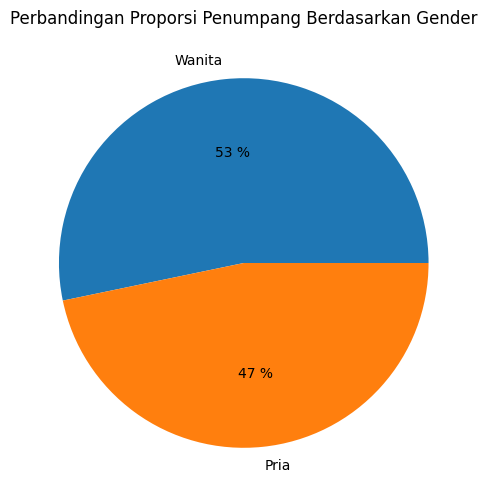

In [152]:
plt.figure(figsize= (10, 6))

plt.pie(
    x= df_gd['payCardID'],
    labels= df_gd['payCardSex'],
    autopct= "%.0f %%"
)

plt.title("Perbandingan Proporsi Penumpang Berdasarkan Gender")

## Jumlah Penumpang Berdasarkan Waktu

In [138]:
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'])
df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'])

df_clean['tapInTime'] = df_clean['tapInTime'].dt.hour
df_clean['tapOutTime'] = df_clean['tapOutTime'].dt.hour

In [141]:
df_tm = df_clean.groupby(by= 'tapInTime')['transID'].count().reset_index()
df_tm.rename(columns= {'transID':'Jumlah'}, inplace= True)
df_tm

,tapInTime,Jumlah
0,5,3060
1,6,5315
2,7,2543
3,8,2622
4,9,2558
5,10,275
6,11,310
7,12,304
8,13,325
9,14,160


Text(0.5, 1.0, 'Jumlah Penumpang Setiap Jamnya')

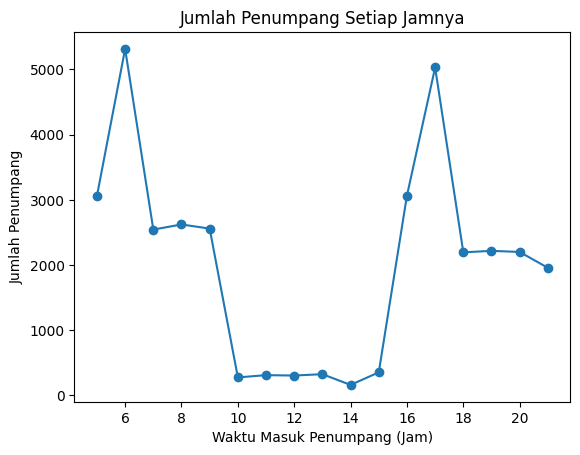

In [144]:
plt.plot(
    df_tm['tapInTime'],
    df_tm['Jumlah'],
    marker= 'o'
)

plt.xlabel('Waktu Masuk Penumpang (Jam)')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Setiap Jamnya')

In [193]:
rush_hour = [5,6,16,17]
df_rh = df_tm[df_tm['tapInTime'].isin(rush_hour)]
persen = df_rh['Jumlah'].sum()/df_tm['Jumlah'].sum()*100
print(f'{persen:.0f}% penumpang menggunakan transjakarta di rush hour')

48% penumpang menggunakan transjakarta di rush hour


## Jumlah Penumpang Berdasarkan Halte Asal

In [168]:
df_hlt = df_clean.groupby(by= ['tapInStopsName', 'corridorName'])['payCardID'].count().reset_index()
df_hlt.rename(columns= {'payCardID' : 'Jumlah'}, inplace= True)
df_hlt.sort_values('Jumlah', ascending= False).head(10)

,tapInStopsName,corridorName,Jumlah
470,Garuda Taman Mini,Pinang Ranti - Pramuka,160
2246,Rusun Kapuk Muara,Rusun Kapuk Muara - Penjaringan,125
1807,Penjaringan,Rusun Kapuk Muara - Penjaringan,112
2920,Simpang Danau Sunter Utara Barat,Harmoni - Jakarta International Stadium,84
296,Cibubur Junction,Cibubur - BKN,83
157,Bermis,Pulo Gadung - Monas,79
2884,Seskoal,Puri Beta 2 - Tendean,78
2259,Rusun Penjaringan,Rusun Penjaringan - Penjaringan,68
1808,Penjaringan,Rusun Penjaringan - Penjaringan,67
175,Bintaro Xchange,Bintaro - Fatmawati,66


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pinang Ranti - Pramuka'),
  Text(1, 0, 'Rusun Kapuk Muara - Penjaringan'),
  Text(2, 0, 'Harmoni - Jakarta International Stadium'),
  Text(3, 0, 'Cibubur - BKN'),
  Text(4, 0, 'Pulo Gadung - Monas'),
  Text(5, 0, 'Puri Beta 2 - Tendean'),
  Text(6, 0, 'Rusun Penjaringan - Penjaringan'),
  Text(7, 0, 'Bintaro - Fatmawati')])

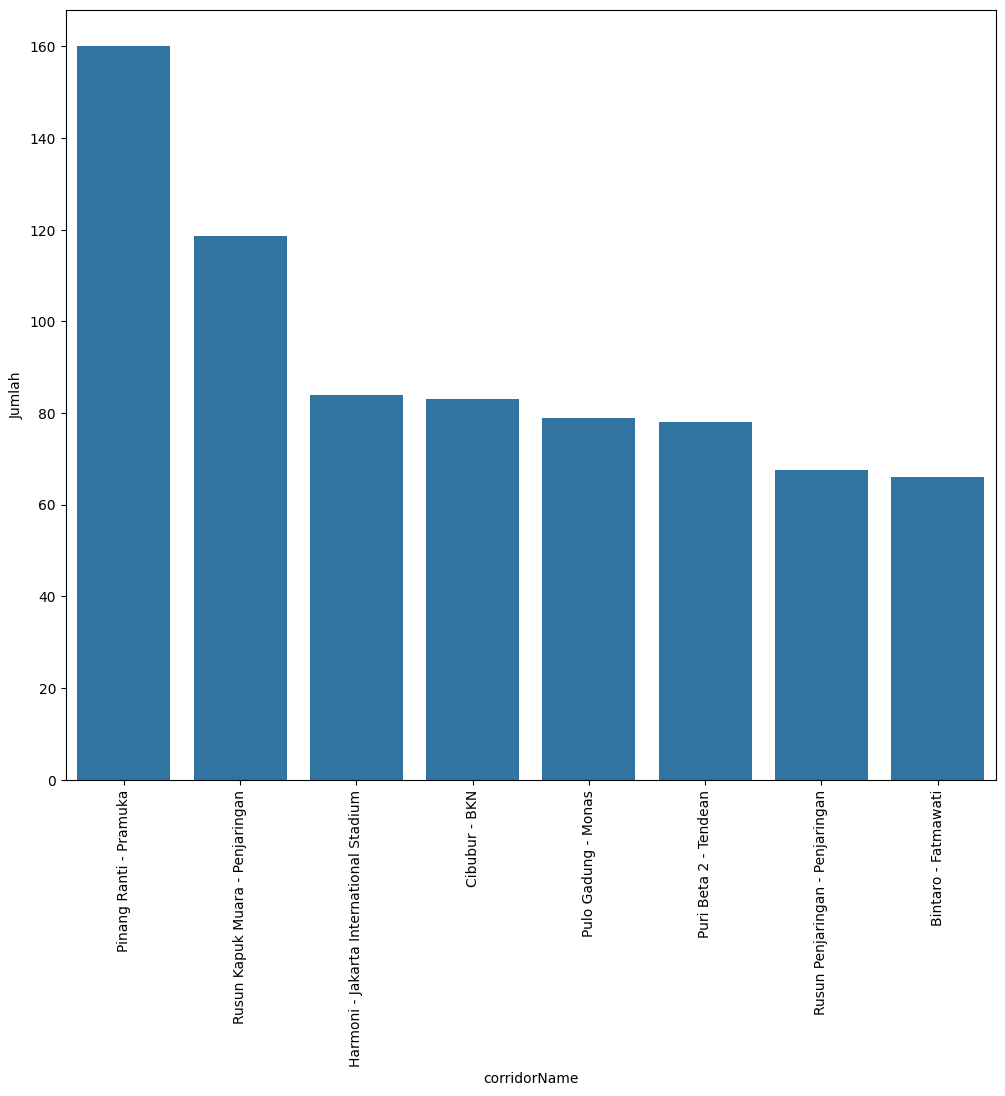

In [178]:
df_hlt_plot = df_hlt.sort_values('Jumlah', ascending= False).head(10)
plt.figure(figsize= (12, 10))

sb.barplot(
    data= df_hlt_plot,
    x= 'corridorName',
    y= 'Jumlah',
    ci=False
)

plt.xticks(rotation=90)

## Jumlah Penumpang Berdasarkan Halte Tujuan

In [214]:
df_hlt2 = df_clean.groupby(by= ['tapOutStopsName', 'corridorName'])['payCardID'].count().reset_index()
df_hlt2.rename(columns= {'payCardID' : 'Jumlah'}, inplace= True)
df_hlt2.sort_values('Jumlah', ascending= False).head(10)

,tapOutStopsName,corridorName,Jumlah
1565,Penjaringan,Rusun Kapuk Muara - Penjaringan,125
63,BKN,Pinang Ranti - Pramuka,117
1982,Rusun Kapuk Muara,Rusun Kapuk Muara - Penjaringan,112
1630,Pinang Ranti,Pinang Ranti - Pramuka,101
251,Cibubur Junction,Cibubur - BKN,98
639,Jembatan Item,Harmoni - Jakarta International Stadium,97
56,BKN,Cibubur - BKN,83
984,Jln. Tebet Timur Dalam VIII J,Sarana Jaya - Tebet Eco Park (TEP) - Stasiun C...,78
1227,Latuharhary,Puri Beta - Kuningan (Express),77
1560,Penggilingan,Rusun Komarudin - Penggilingan,69


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Rusun Kapuk Muara - Penjaringan'),
  Text(1, 0, 'Pinang Ranti - Pramuka'),
  Text(2, 0, 'Cibubur - BKN'),
  Text(3, 0, 'Harmoni - Jakarta International Stadium'),
  Text(4, 0, 'Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang'),
  Text(5, 0, 'Puri Beta - Kuningan (Express)'),
  Text(6, 0, 'Rusun Komarudin - Penggilingan')])

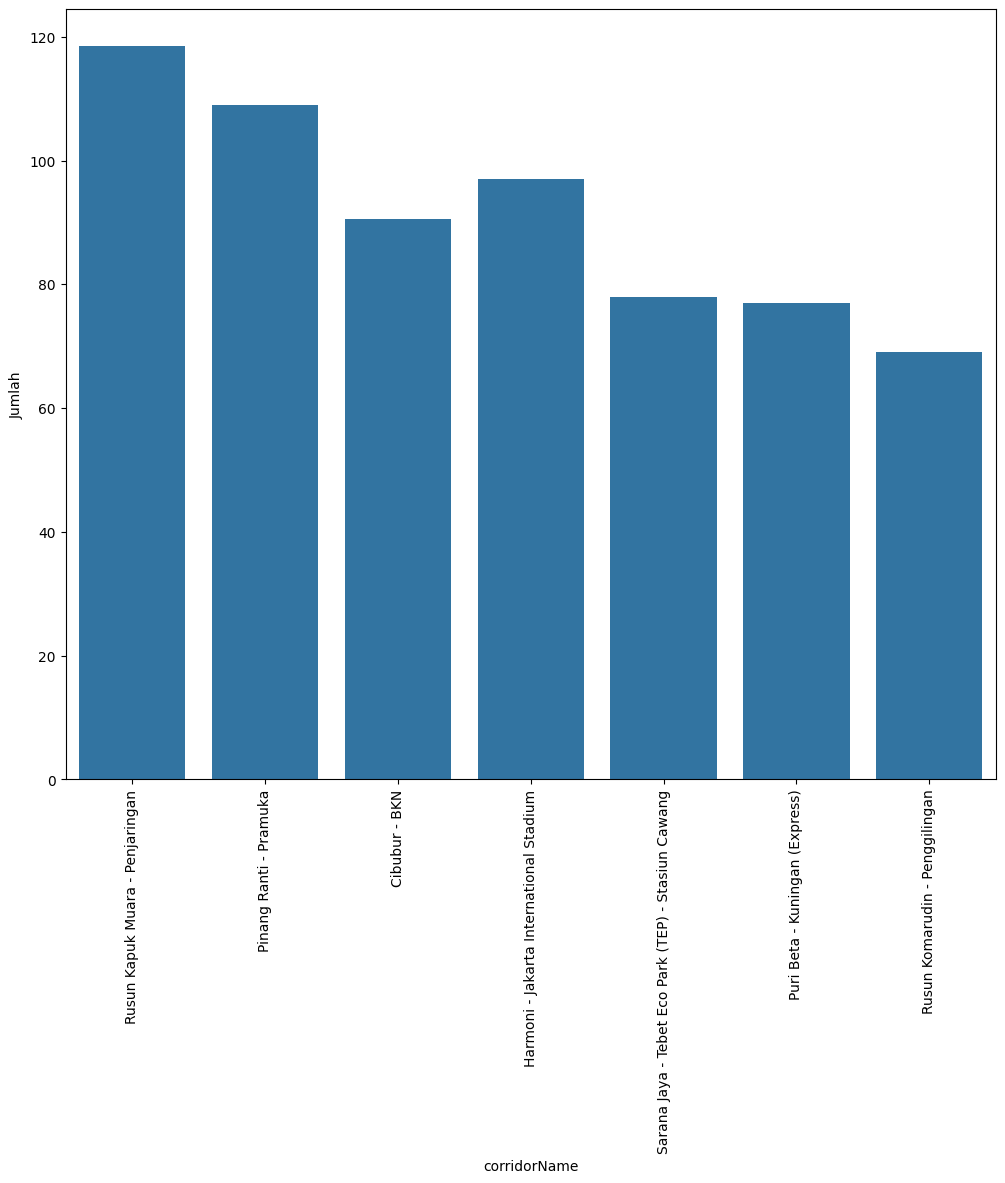

In [177]:
df_hlt2_plot = df_hlt2.sort_values('Jumlah', ascending= False).head(10)
plt.figure(figsize= (12, 10))

sb.barplot(
    data= df_hlt2_plot,
    x= 'corridorName',
    y= 'Jumlah',
    ci=False
)

plt.xticks(rotation=90)

# Kesimpulan dan Rekomendasi

### Kesimpulan
Dari Analisis yang telah dilakukan, dapat disimpulkan:
* Kebanyakan pengguna transjakarta merupakan perempuan, dengan 53% dari data pengguna merupakan perempuan
* Dari 34488 data pengguna transjakarta, 48% diantaranya menggunakan transJakarta di rush hour yaitu pukul 05:00-06:00 pagi dan 16:00-17:00 sore
* Halte Garuda Taman Mini dan Halte Rusun Kapuk Muara merupakan 2 halte asal dengan jumlah penumpang tertinggi, dan Halte Penjaringan dan Halte BKN merupakan 2 halte tujuan dengan jumlah penumpang tertinggi 
* Dari halte asal dan tujuan bus dengan jurusan Rusun Kapuk Muara dan Pinang Ranti - Pramuka memiliki jumlah penumpang paling tinggi

## Rekomendasi

1. Dengan jumlah penumpang perempuan yang lebih banyak, dapat dilakukan pengadaan unit bus khusus wanita untuk menampung jumlah penumpang
2. interval waktu kedatangan bus perlu dipersingkat di jam-jam sibuk yaitu 05:00-0600 dan 16:00-17:00, untuk menghindari penumpukan penumpang di rush hour
3. Halte-halte dengan jumlah pengguna yang tinggi perlu diperhatikan dalam distribusi bus
4. Bus dengan jumlah penumpang yang tinggi dari halte tertentu perlu menjadi fokus untuk menghasilkan distribusi unit bus transjakarta untuk yang efektif dan efisien